# Download Required Packages

In [43]:
%%capture
%pip install numpy
%pip install matplotlib
%pip install pandas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Parse Dataset

In [44]:
temp_data = np.genfromtxt('./CollectedData.tsv', delimiter='\t', dtype='float')
temp_data = np.delete(temp_data, 0, 0)
temp_stringData = np.genfromtxt('./CollectedData.tsv', delimiter='\t', dtype=str)
temp_stringData = np.delete(temp_stringData, 0, 0)

x_index = 18
y_index = 14
address_i = 0
bathrooms_i = 1
bedrooms_i = 2
daysOnMarket_i = 6
lotSize_i = 13
price_i = 14
propertyType_i = 15
squareFootage_i = 18
status_i = 20
yearBuilt_i = 21

data = []
stringData = []

for d, str_d in zip(temp_data, temp_stringData):
    if d[price_i] > 0 and d[price_i] < 1_000_000 and d[bathrooms_i] > 0 and d[bedrooms_i] > 0 and d[daysOnMarket_i] > 0 and d[lotSize_i] > 0 and d[squareFootage_i] > 0 and d[squareFootage_i] < 3000 and d[yearBuilt_i] > 0 and str_d[propertyType_i] == "Single Family" and str_d[status_i] == 'Active':
        data.append(d)
        stringData.append(str_d)
data = np.array(data)

# Plot Sqft Area vs Price

Number of data points included: 4553


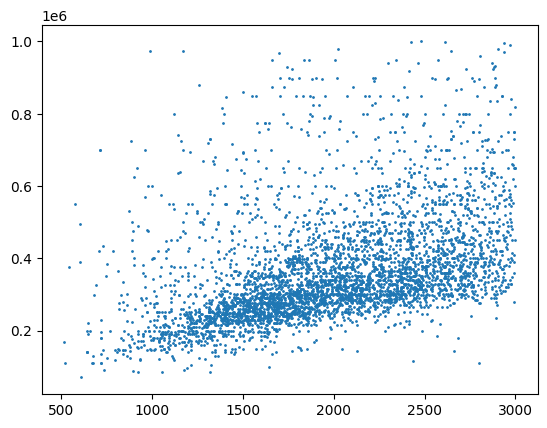

In [45]:
plt.scatter(data[:, x_index], data[:, y_index], s=1)
print("Number of data points included:", len(data))

# Run 2D Gradient Descent Algo

[0/1]: x0 = 0.12354598245297307 x1=189.71081339768747


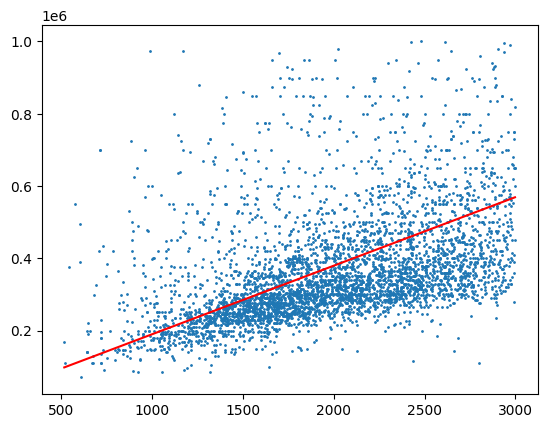

theta_0:  [0.12354598]
theta_1:  [189.7108134]


In [46]:
placeholder_x = np.arange(np.amin(data[:, x_index]), np.amax(data[:,x_index]))

def sgd(data, training_rate=0.000000001, iters=1):
    theta = np.array([[0],[0]])
    X = data[:, [x_index]].astype(int)
    X_1 = np.ones(X.shape, dtype=X.dtype)
    X = np.hstack((X_1, X))
    Y = data[:, [y_index]].T[0].astype(int)

    for _ in range(iters):
        for x, y in zip(X, Y):
            h_x = np.matmul(theta.T, x)
            x = np.reshape(x, theta.shape)
            theta = theta - training_rate * (h_x - y) * x

        print(f'[{_}/{iters}]: x0 = {theta[0,0]} x1={theta[1,0]}')
        # plot charts
        plt.scatter(data[:, x_index], data[:, y_index], s=1)
        plt.plot(placeholder_x, theta[1,0]*placeholder_x + theta[0,0], color='red')
        plt.show()

    return theta


theta = sgd(data)
print("theta_0: ", theta[0])
print("theta_1: ", theta[1])


# Run Mulitvar Gradient Descent

In [47]:
def sgd(X, Y, training_rate=0.0000000000001, iters=1000):
    n_features = len(X[0])
    theta = np.zeros((n_features, 1))


    for _ in range(iters):
        for x, y in zip(X, Y):
            y_pred = theta.T @ x
            x = np.reshape(x, theta.shape)
            theta = theta - training_rate * (y_pred - y) * x    
    return theta


filteredData = np.ones((len(data[:, 1]), 1))
# filteredData = np.hstack((filteredData, np.array([data[:, bathrooms_i]]).T)) # append bathrooms column
# filteredData = np.hstack((filteredData, np.array([data[:, bedrooms_i]]).T)) # append bedrooms column
# filteredData = np.hstack((filteredData, np.array([data[:, daysOnMarket_i]]).T)) # append days on market column
filteredData = np.hstack((filteredData, np.array([data[:, lotSize_i]]).T)) # append lot size column
filteredData = np.hstack((filteredData, np.array([data[:, squareFootage_i]]).T)) # append square footage column
# filteredData = np.hstack((filteredData, np.array([data[:, yearBuilt_i]]).T)) # append year built column

theta = sgd(filteredData, data[:, price_i])

print("theta0=\t\t", np.around(theta[0], decimals=3))
# print("theta1 bathrooms=\t", np.around(theta[1], decimals=3))
# print("theta2 bedrooms=\t", np.around(theta[2], decimals=3))
# print("theta3 marketDays=\t", np.around(theta[3], decimals=3))
print("theta4 lotSize=\t", np.around(theta[1], decimals=3))
print("theta5 sqft=\t", np.around(theta[2], decimals=3))
# print("theta6 yearBuilt=\t", np.around(theta[6], decimals=3))

theta0=		 [0.072]
theta4 lotSize=	 [0.836]
theta5 sqft=	 [146.69]


# Check Database for Underpriced Houses Based on Lot Size and Square Footage

In [55]:
# Filter out unactive listings and listings without lotsize and square footage

lotSizeAndSqftData = []
lotSizeAndSqftStrData = []
for d, str_d in zip(temp_data, temp_stringData):
    if d[lotSize_i] > 0 and d[squareFootage_i] > 0 and d[squareFootage_i] < 3000 and str_d[propertyType_i] == "Single Family" and str_d[status_i] == 'Active' and d[lotSize_i] < 20000:
        lotSizeAndSqftData.append(d)
        lotSizeAndSqftStrData.append(str_d)

pricingErrors = []
for d, str_d in zip(lotSizeAndSqftData, lotSizeAndSqftStrData):
    lotSize = d[lotSize_i]
    squareFootage = d[squareFootage_i]
    price = d[price_i]
    address = str_d[address_i]

    x = np.array([[1], [lotSize], [squareFootage]])
    y_pred = theta.T @ x
    error = price - y_pred
    pricingErrors.append((error[0][0], address, y_pred[0][0], price, squareFootage, lotSize))

pricingErrors.sort()

for listing in pricingErrors:
    print(round(listing[0]), '\t', listing[1], '\t', round(listing[2]), round(listing[3]), round(listing[4]), round(listing[5]))

NameError: name 'lostSize_i' is not defined

# Get Price Estimation of Your House

In [50]:
# bathrooms = float(input() or 3)
# bedrooms = float(input() or 4)
# daysOnMarket = int(input() or 1)
lotSize = float(input() or 7000)
squareFootage = float(input() or 2100)
# yearBuilt = int(input() or 1998)

x = np.array([
    [1],
    # [bathrooms],
    # [bedrooms],
    # [daysOnMarket],
    [lotSize],
    [squareFootage],
    # [yearBuilt]
])

price_estimate = theta.T @ x
print(price_estimate[0][0])


313902.45075849985
